<a href="https://colab.research.google.com/github/dilawaiz-khan/twitter-sentiment-analysis/blob/main/tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 1 ( setup and package download)

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


# Step 1: Sample text
text = """Natural Language Processing (NLP) is a field of Artificial Intelligence
that focuses on the interaction between computers and humans through natural language."""

# Step 2: Convert to lowercase
text_lower = text.lower()

# Step 3: Remove punctuation and special characters
text_clean = re.sub(r'[^a-z\s]', '', text_lower)

# Step 4: Tokenize text
tokens = word_tokenize(text_clean)

# Step 5: Remove stop words
stop_words = set(stopwords.words('english'))
tokens_filtered = [word for word in tokens if word not in stop_words]

print("Processed Tokens:", tokens_filtered)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processed Tokens: ['natural', 'language', 'processing', 'nlp', 'field', 'artificial', 'intelligence', 'focuses', 'interaction', 'computers', 'humans', 'natural', 'language']


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Tweets - Tweets.csv")
print(df['airline_sentiment'].value_counts())
df.head(10) #show 10 data

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,5.703006e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,5.703002e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,5.702955e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


week 2 (data cleaning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Tweets - Tweets.csv")
print(df['airline_sentiment'].value_counts())

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

# Simple preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Check sample
print(df[['text', 'clean_text']].head())


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                          clean_text  
0                        virginamerica dhepburn said  
1  virginamerica plus youve added commercials exp...  
2  virginamerica didnt today must mean need take ...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing  


In [3]:
from collections import Counter

# Combine all cleaned tweets into one big string and split into words
all_words = " ".join(df['clean_text']).split()

# Count word frequency
word_freq = Counter(all_words)

# Show top 5 most common words
print("\nTop 5 most common words:")
print(word_freq.most_common(5))



Top 5 most common words:
[('united', 4144), ('flight', 3895), ('usairways', 3051), ('americanair', 2957), ('southwestair', 2453)]


In [4]:
from textblob import TextBlob

# Take a few random tweets and predict sentiment
sample_tweets = df['text'].sample(5, random_state=42)

for tweet in sample_tweets:
    polarity = TextBlob(tweet).sentiment.polarity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment} (polarity={polarity})\n")


Tweet: @SouthwestAir you're my early frontrunner for best airline! #oscars2016
Predicted Sentiment: Positive (polarity=0.55)

Tweet: @USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?
Predicted Sentiment: Neutral (polarity=0.0)

Tweet: @JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?
Predicted Sentiment: Negative (polarity=-0.07142857142857142)

Tweet: @JetBlue do they have to depart from Washington, D.C.??
Predicted Sentiment: Neutral (polarity=0.0)

Tweet: @JetBlue I can probably find some of them. Are the ticket #s on there?
Predicted Sentiment: Neutral (polarity=0.0)



week 3+6 (Data Visualization+ classifaction)

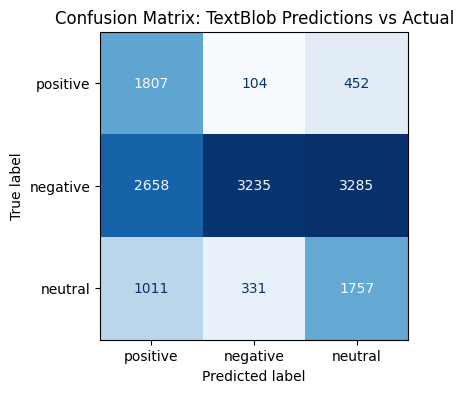


Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.35      0.50      9178
     neutral       0.32      0.57      0.41      3099
    positive       0.33      0.76      0.46      2363

    accuracy                           0.46     14640
   macro avg       0.51      0.56      0.46     14640
weighted avg       0.67      0.46      0.48     14640



In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Function to classify sentiment using TextBlob
def predict_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

# Apply prediction to dataset
df['predicted_sentiment'] = df['text'].apply(predict_sentiment)

# Generate confusion matrix
labels = ["positive", "negative", "neutral"]
cm = confusion_matrix(df['airline_sentiment'], df['predicted_sentiment'], labels=labels)

# Plot confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(6, 4))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
plt.title("Confusion Matrix: TextBlob Predictions vs Actual")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(df['airline_sentiment'], df['predicted_sentiment']))


Week 5+7 ( model creation(regression)+ model evaluation )

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply cleaning to the tweet column
df['clean_text'] = df['text'].apply(clean_text)

# Now define cleaned_texts
cleaned_texts = df['clean_text'].values

# Convert to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(cleaned_texts)

# Target variable
y = df['airline_sentiment']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    negative       0.90      0.80      0.85      1889
     neutral       0.53      0.68      0.60       580
    positive       0.69      0.77      0.73       459

    accuracy                           0.77      2928
   macro avg       0.71      0.75      0.72      2928
weighted avg       0.80      0.77      0.78      2928

